In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_columns', None)

## 1. Question 1: 

#### Q1 : What are the most important amenities for a house, and which neighbourhood supplies which amenities for accommodation? And then compare them between Boston and Seattle.

In [2]:
seattle_listings = pd.read_csv('data/seattle/listings.csv')
seattle_listings.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2318,https://www.airbnb.com/rooms/2318,20200521035945,2020-05-21,Casa Madrona - Urban Oasis 1 block from the park!,"Gorgeous, architect remodeled, Dutch Colonial ...","This beautiful, gracious home has been complet...","Gorgeous, architect remodeled, Dutch Colonial ...",none,Madrona is a hidden gem of a neighborhood. It ...,"We adhere to a 10pm -9am quiet hour schedule, ...",NaN,Guests can access any part of the house.,We are a family who live next door and are ava...,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/02973ad3-a...,NaN,2536,https://www.airbnb.com/users/show/2536,Megan,2008-08-26,"Seattle, Washington, United States",I welcome guests from all walks of life and ev...,within a few hours,67%,88%,t,https://a0.muscache.com/im/pictures/user/016a1...,https://a0.muscache.com/im/pictures/user/016a1...,Minor,2,2,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,f,"Seattle, WA, United States",Madrona,Madrona,Central Area,Seattle,WA,98122,Seattle,"Seattle, WA",US,United States,47.61082,-122.29082,t,House,Entire home/apt,9,2.5,4.0,4.0,Real Bed,"{Internet,Wifi,Kitchen,""Free parking on premis...",NaN,$296.00,NaN,NaN,$500.00,$250.00,8,$25.00,1,1125,1,1,1125,1125,1.0,1125.0,today,t,29,59,89,132,2020-05-21,32,7,2008-09-15,2020-02-01,100.0,10.0,10.0,10.0,10.0,10.0,10.0,t,STR-OPLI-19-002837,"{WASHINGTON,"" Seattle"","" WA""}",t,f,strict_14_with_grace_period,f,f,2,2,0,0,0.22
1,6606,https://www.airbnb.com/rooms/6606,20200521035945,2020-05-21,"Fab, private seattle urban cottage!","This tiny cottage is only 15x10, but it has ev...","Soo centrally located, this is a little house ...","This tiny cottage is only 15x10, but it has ev...",none,"A peaceful yet highly accessible neighborhood,...","Check in is at three, if you'd like a snack or...",NaN,NaN,I often escape to kingston and my place on the...,Please treat the cottage as if it were your ow...,NaN,NaN,https://a0.muscache.com/im/pictures/45742/2111...,NaN,14942,https://www.airbnb.com/users/show/14942,Joyce,2009-04-26,"Seattle, Washington, United States",I am a therapist/innkeeper.I know my city well...,within an hour,100%,92%,f,https://a0.muscache.com/im/users/14942/profile...,https://a0.muscache.com/im/users/14942/profile...,Wallingford,5,5,"['email', 'phone', 'facebook', 're

In [3]:
boston_listings = pd.read_csv('data/boston/listings.csv')
boston_listings.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3781,https://www.airbnb.com/rooms/3781,20200610033559,2020-06-10,HARBORSIDE-Walk to subway,Fully separate apartment in a two apartment bu...,This is a totally separate apartment located o...,Fully separate apartment in a two apartment bu...,none,"Mostly quiet ( no loud music, no crowed sidewa...",Building is on quiet side of airport. Building...,Local subway stop ( Maverick Station on the Bl...,Guests solely occupy the 1 floor apartment wit...,We sometimes travel. Always available via: mob...,"No pets, no smoking.",NaN,NaN,https://a0.muscache.com/im/pictures/24670/b2de...,NaN,4804,https://www.airbnb.com/users/show/4804,Frank,2008-12-03,Massachusetts,My wife and I and grown children frequently oc...,within a day,75%,44%,t,https://a0.muscache.com/im/users/4804/profile_...,https://a0.muscache.com/im/users/4804/profile_...,East Boston,5.0,5.0,"['email', 'phone', 'reviews']",t,f,"Boston, MA, United States",East Boston,East Boston,NaN,Boston,MA,02128,Boston,"Boston, MA",US,United States,42.36413,-71.02991,t,Apartment,Entire home/apt,2,1.0,1.0,0.0,Real Bed,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",NaN,$125.00,$750.00,"$2,250.00",$0.00,$75.00,2,$0.00,28,1125,28,28,1125,1125,28.0,1125.0,4 months ago,t,0,0,7,97,2020-06-10,16,1,2015-07-10,2019-12-21,99.0,10.0,10.0,10.0,10.0,10.0,10.0,t,NaN,"{""Massachusetts State"","" Massachusetts State""}",f,f,super_strict_30,f,f,1,1,0,0,0.27
1,5506,https://www.airbnb.com/rooms/5506,20200610033559,2020-06-10,**$49 Special ** Private! Minutes to center!,"Private guest room with private bath, You do n...",**THE BEST Value in BOSTON!!*** PRIVATE GUEST ...,"Private guest room with private bath, You do n...",none,"Peacful, Architecturally interesting, historic...","Guest room is on the 3rd floor, Steps are req...","Excellent Access to all of Boston, Walk to Mus...",You get full access to the guest room with pri...,"We give guests privacy, but we are available ...",No Smoking in the Building.,NaN,NaN,https://a0.muscache.com/im/pictures/1598e8b6-5...,NaN,8229,https://www.airbnb.com/users/show/8229,Terry,2009-02-19,"Boston, Massachusetts, United States","Relaxed, Easy going, Accommodating.",within an hour,100%,100%,t,https://a0.muscache.com/im/users/8229/profile_...,https://a0.muscache.com/i

In [4]:
# Create new dataframes for Seattle.
seattle_amenities = seattle_listings[['id', 'amenities', 'review_scores_rating', 'number_of_reviews']].copy()

seattle_amenities.head()

,id,amenities,review_scores_rating,number_of_reviews
0,2318,"{Internet,Wifi,Kitchen,""Free parking on premis...",100.0,32
1,6606,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",92.0,150
2,9419,"{Internet,Wifi,""Air conditioning"",Kitchen,""Fre...",93.0,148
3,9531,"{TV,""Cable TV"",Internet,Wifi,""Wheelchair acces...",100.0,40
4,9534,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Free par...",100.0,50


In [5]:
# Create new dataframes for Boston.
boston_amenities = boston_listings[['id', 'amenities', 'review_scores_rating', 'number_of_reviews']].copy()

boston_amenities.head()

,id,amenities,review_scores_rating,number_of_reviews
0,3781,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",99.0,16
1,5506,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",95.0,107
2,6695,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",96.0,115
3,8789,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",93.0,25
4,10730,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",96.0,32


In [6]:
seattle_amenities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7017 entries, 0 to 7016
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    7017 non-null   int64  
 1   amenities             7017 non-null   object 
 2   review_scores_rating  6030 non-null   float64
 3   number_of_reviews     7017 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 219.4+ KB


In [7]:
boston_amenities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3440 entries, 0 to 3439
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    3440 non-null   int64  
 1   amenities             3440 non-null   object 
 2   review_scores_rating  2698 non-null   float64
 3   number_of_reviews     3440 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 107.6+ KB


Let's look at the missing data before we move on to analyze our data!

### 1.1. Handling Missing Data: 

In [8]:
boston_amenities.loc[(boston_amenities['review_scores_rating'].isnull()) & (boston_amenities['number_of_reviews'] > 0)]

,id,amenities,review_scores_rating,number_of_reviews
6,10986,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,2
548,9169272,"{Internet,Wifi,Kitchen,""Buzzer/wireless interc...",NaN,1
559,9393163,"{""Cable TV"",Internet,Wifi,Kitchen,Heating,Wash...",NaN,1
627,11282071,"{""Cable TV"",Internet,Wifi,""Air conditioning"",""...",NaN,1
1371,21648941,"{TV,Wifi,""Air conditioning"",Kitchen,""Free stre...",NaN,1
1468,22384609,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",NaN,1
1473,22432082,"{TV,""Cable TV"",Wifi,""Free parking on premises""...",NaN,1
1646,24035810,"{Wifi,Kitchen,Elevator,Heating,Washer,Dryer,Sh...",NaN,1
2012,29492253,"{Internet,Wifi,""Air conditioning"",Kitchen,Heat...",NaN,1
2461,35716618,"{TV,Kitchen,""Pets allowed"",Elevator,Heating,Wa...",NaN,1


As we can see, even though if a house has a review, it may not have a review score. So, we cannot know the outcome of these ratings. 

**Solution:** Ultimately, the only choice for me is to discard these rows!

In [9]:
boston_amenities.loc[(boston_amenities['review_scores_rating'].isnull()) & (boston_amenities['number_of_reviews'] == 0)]

,id,amenities,review_scores_rating,number_of_reviews
7,16384,{Wifi},NaN,0
78,1077105,{},NaN,0
186,3414993,"{TV,Internet,Wifi,""Air conditioning"",""Wheelcha...",NaN,0
195,3544343,"{TV,Internet,Wifi,Kitchen,Doorman,Elevator,""Bu...",NaN,0
202,3705824,"{Internet,Wifi,""Air conditioning"",Kitchen,Heat...",NaN,0
...,...,...,...,...
3435,43690671,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",NaN,0
3436,43690782,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",NaN,0
3437,43715032,"{TV,Internet,Wifi,""Air conditioning"",""Pets all...",NaN,0
3438,43715125,"{TV,Wifi,""Air conditioning"",Kitchen,""Free park...",NaN,0


However, I will keep the rows with no reviews for my inferences! 

**Solution:** I will just impute them as 0!

In [10]:
seattle_amenities = seattle_amenities.loc[~((seattle_amenities['review_scores_rating'].isnull()) & (seattle_amenities['number_of_reviews'] > 0))]

In [11]:
seattle_amenities.fillna(value=0., inplace=True)

In [12]:
boston_amenities = boston_amenities.loc[~((boston_amenities['review_scores_rating'].isnull()) & (boston_amenities['number_of_reviews'] > 0))]

In [13]:
boston_amenities.fillna(value=0., inplace=True)

In [14]:
seattle_amenities.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6971 entries, 0 to 7016
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    6971 non-null   int64  
 1   amenities             6971 non-null   object 
 2   review_scores_rating  6971 non-null   float64
 3   number_of_reviews     6971 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 272.3+ KB


In [15]:
boston_amenities.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3426 entries, 0 to 3439
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    3426 non-null   int64  
 1   amenities             3426 non-null   object 
 2   review_scores_rating  3426 non-null   float64
 3   number_of_reviews     3426 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 133.8+ KB


### 1.2. Feature Engineering: 

#### 1.2.1. Create A Formula For House Score 

I will try to calculate a score for a listing with my dumb formula :) This formula is devoted 100% to me; so don't blame anybody if does not make sense at all.
This is;

$ score = [ReviewScoresRating] * [log(numberOfReviews)]$

1. As you can see, to have a high score for a listing, you have to have high reviews but also have high number of reviews. However; the number of reviews is not very important as the score; so I imputed it with logarithm to lower its power on the score for a listing.

In [16]:
seattle_amenities['score'] = (seattle_amenities['review_scores_rating']) * np.log2(seattle_amenities['number_of_reviews'] + 0.00000001)

In [17]:
boston_amenities['score'] = (boston_amenities['review_scores_rating']) * np.log2(boston_amenities['number_of_reviews']  + 0.00000001)

In [18]:
seattle_amenities.head()

,id,amenities,review_scores_rating,number_of_reviews,score
0,2318,"{Internet,Wifi,Kitchen,""Free parking on premis...",100.0,32,500.000000
1,6606,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",92.0,150,665.051320
2,9419,"{Internet,Wifi,""Air conditioning"",Kitchen,""Fre...",93.0,148,670.479163
3,9531,"{TV,""Cable TV"",Internet,Wifi,""Wheelchair acces...",100.0,40,532.192810
4,9534,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Free par...",100.0,50,564.385619


In [19]:
seattle_amenities.shape

(6971, 5)

In [20]:
boston_amenities.head()

,id,amenities,review_scores_rating,number_of_reviews,score
0,3781,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",99.0,16,396.000000
1,5506,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",95.0,107,640.439364
2,6695,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",96.0,115,657.167045
3,8789,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",93.0,25,431.878626
4,10730,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",96.0,32,480.000000


In [21]:
boston_amenities.shape

(3426, 5)

#### 1.2.2. Clean Amenities For Better Representation

In [22]:
cleaned_amenities_seattle = seattle_amenities['amenities'].str.replace('{', '').str.replace('}', '').str.split(',', expand=True).stack().str.get_dummies().sum(level=0)

In [23]:
seattle_amenities = pd.concat([seattle_amenities, cleaned_amenities_seattle], 1)

In [24]:
seattle_amenities.rename(columns= lambda s: s.replace('"', '').strip().capitalize(), inplace=True)

In [25]:
seattle_amenities.drop(columns=['Amenities'], inplace=True)

In [26]:
cleaned_amenities_boston = boston_amenities['amenities'].str.replace('{', '').str.replace('}', '').str.split(',', expand=True).stack().str.get_dummies().sum(level=0)

In [27]:
boston_amenities = pd.concat([boston_amenities, cleaned_amenities_boston], 1)

In [28]:
boston_amenities.rename(columns= lambda s: s.replace('"', '').strip().capitalize(), inplace=True)

In [29]:
boston_amenities.drop(columns=['Amenities'], inplace=True)

In [30]:
seattle_amenities.head()

,Id,Review_scores_rating,Number_of_reviews,Score,Toilet,24-hour check-in,Accessible-height bed,Accessible-height toilet,Air conditioning,Air purifier,Amazon echo,Bbq grill,Baby bath,Baby monitor,Babysitter recommendations,Baking sheet,Barbecue utensils,Bath towel,Bathroom essentials,Bathtub with bath chair,Beach essentials,Beach view,Bed linens,Bedroom comforts,Body soap,Bread maker,Breakfast table,Building staff,Buzzer/wireless intercom,Cable tv,Carbon monoxide detector,Ceiling fan,Central air conditioning,Changing table,Children’s books and toys,Children’s dinnerware,Cleaning before checkout,Coffee maker,Convection oven,Cooking basics,Dvd player,Day bed,Disabled parking spot,Dishes and silverware,Double oven,Ev charger,Electric profiling bed,En suite bathroom,Espresso machine,Ethernet connection,Exercise equipment,Extra pillows and blankets,Extra space around bed,Family/kid friendly,Fire extinguisher,Fire pit,Fireplace guards,Firm mattress,First aid kit,Fixed grab bars for shower,Fixed grab bars for shower,Flat path to guest entrance,Formal dining area,Free parking on premises,Free street parking,Full kitchen,Game console,Garden or backyard,Gas oven,Ground floor access,Hbo go,Hair dryer,Handheld shower head,Heat lamps,Heated floors,Heated towel rack,High chair,High-resolution computer monitor,Host greets you,Hot tub,Hot water kettle,Hot water,Indoor fireplace,Jetted tub,Lake access,Laptop friendly workspace,Lock on bedroom door,Long term stays allowed,Luggage dropoff allowed,Memory foam mattress,Mini fridge,Mountain view,Murphy bed,No stairs or steps to enter,Other pet(s),Outdoor parking,Outdoor seating,Outlet covers,Pack ’n play/travel crib,Paid parking off premises,Paid parking on premises,Patio or balcony,Pets allowed,Pets live on this property,Pillow-top mattress,Pocket wifi,Private bathroom,Private entrance,Private gym,Private hot tub,Private living room,Projector and screen,Rain shower,Room-darkening shades,Safety card,Self check-in,Shared gym,Shared hot tub,Shared pool,Shower chair,Shower gel,Single level home,Smart tv,Smart lock,Smoke detector,Smoking allowed,Soaking tub,Sound system,Stair gates,Stand alone steam shower,Standing valet,Steam oven,Step-free shower,Suitable for events,Sun loungers,Table corner guards,Tennis court,Toilet paper,Trash can,Walk-in shower,Warming drawer,Well-lit path to entrance,Wheelchair accessible,Wide clearance to shower,Wide doorway to guest bathroom,Wide entrance for guests,Wide entrance,Wide entryway,Wide hallways,Window guards,Wine cooler,Wireless intercom,Translation missing: en.hosting_amenity_49,Translation missing: en.hosting_amenity_50,Balcony,Bathtub,Beachfront,Bidet,Breakfast,Cat(s),Crib,Dishwasher,Dog(s),Doorman,Dryer,Elevator,Essentials,Gym,Hammock,Hangers,Heating,Internet,Iron,Keypad,Kitchen,Kitchenette,Lockbox,Microwave,Mudroom,Netflix,Other,Oven,Pool,Printer,Refrigerator,Sauna,Shampoo,Ski-in/ski-out,Stove,Tv,Terrace,Washer,Washer/dryer,Waterfront,Wifi
0,2318,100.0,32,500.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,1,1,1,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1
1,6606,92.0,150,665.051320,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1
2,9419,93.0,148,670.479163,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1

In [31]:
boston_amenities.head()

,Id,Review_scores_rating,Number_of_reviews,Score,Toilet,24-hour check-in,Accessible-height bed,Accessible-height toilet,Air conditioning,Bbq grill,Baby bath,Baby monitor,Babysitter recommendations,Baking sheet,Barbecue utensils,Bath towel,Bathroom essentials,Bathtub with bath chair,Beach essentials,Bed linens,Bedroom comforts,Board games,Body soap,Bottled water,Bread maker,Building staff,Buzzer/wireless intercom,Cable tv,Carbon monoxide alarm,Changing table,Children’s books and toys,Children’s dinnerware,Cleaning before checkout,Coffee maker,Cooking basics,Disabled parking spot,Dishes and silverware,Ev charger,Ethernet connection,Extra pillows and blankets,Extra space around bed,Family/kid friendly,Fire extinguisher,Fireplace guards,Firm mattress,First aid kit,Fixed grab bars for shower,Fixed grab bars for toilet,Flat path to guest entrance,Free parking on premises,Free street parking,Front desk,Game console,Game room,Garden or backyard,Hair dryer,Handheld shower head,High chair,Host greets you,Hot tub,Hot water kettle,Hot water,Indoor fireplace,Lake access,Laptop-friendly workspace,Lock on bedroom door,Long term stays allowed,Luggage dropoff allowed,Luggage storage,No stairs or steps to enter,Other pet(s),Outlet covers,Pack ’n play/travel crib,Paid parking off premises,Paid parking on premises,Patio or balcony,Pets allowed,Pets live on this property,Pocket wifi,Private bathroom,Private entrance,Private living room,Room-darkening shades,Safety card,Self check-in,Self parking,Shower chair,Shower gel,Single level home,Smart lock,Smoke alarm,Smoking allowed,Stair gates,Suitable for events,Table corner guards,Toilet paper,Trash can,Well-lit path to entrance,Wheelchair accessible,Wide clearance to shower,Wide entrance for guests,Wide hallways,Window guards,Translation missing: en.hosting_amenity_105,Translation missing: en.hosting_amenity_49,Translation missing: en.hosting_amenity_50,Bathtub,Beachfront,Breakfast,Cat(s),Concierge,Crib,Dishwasher,Dog(s),Doorman,Dryer,Elevator,Essentials,Gym,Hangers,Heating,Internet,Iron,Keypad,Kitchen,Liquor,Lockbox,Microwave,Other,Oven,Pool,Refrigerator,Safe,Shampoo,Ski-in/ski-out,Snacks,Stove,Tv,Washer,Waterfront,Wifi
0,3781,99.0,16,396.000000,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0,1,1,1,0,1
1,5506,95.0,107,640.439364,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,1,1,1,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,1,0,1
2,6695,96.0,115,657.167045,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,1,1,1,1,1,0,0,1,0,1,0,1,0,1,0,0,1,1,1,0,1
3,8789,93.0,25,431.878626,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,1,1,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,1,0,1
4,10730,96.0,32,480.000000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,1,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,0,1,1,0,1


**As we can see, we cleaned amenities column into distinct columns for amenity features for that house (1 if this feature exists, 0 if not)**

### 1.3. Analyze The Data 

In [32]:
seattle_amenity_offers = seattle_amenities.iloc[:, 4:].sum().sort_values(ascending=False)

In [33]:
seattle_amenity_offers = seattle_amenity_offers.reset_index()
seattle_amenity_offers.columns = ['Amenity', '# Of Listings That Offer']
seattle_amenity_offers['Percentage Of Houses'] = seattle_amenity_offers['# Of Listings That Offer'] / seattle_amenities.shape[0]

In [34]:
seattle_amenity_offers

,Amenity,# Of Listings That Offer,Percentage Of Houses
0,Wifi,6855,0.983360
1,Essentials,6815,0.977622
2,Heating,6804,0.976044
3,Smoke detector,6751,0.968441
4,Shampoo,6401,0.918233
...,...,...,...
186,Air purifier,1,0.000143
187,Bidet,1,0.000143
188,Fixed grab bars for shower,1,0.000143
189,Electric profiling bed,1,0.000143


In [35]:
boston_amenity_offers = boston_amenities.iloc[:, 4:].sum().sort_values(ascending=False)

In [36]:
boston_amenity_offers = boston_amenity_offers.reset_index()
boston_amenity_offers.columns = ['Amenity', '# Of Listings That Offer']
boston_amenity_offers['Percentage Of Houses'] = boston_amenity_offers['# Of Listings That Offer'] / boston_amenities.shape[0]

In [37]:
boston_amenity_offers

,Amenity,# Of Listings That Offer,Percentage Of Houses
0,Wifi,3348,0.977233
1,Smoke alarm,3341,0.975190
2,Heating,3305,0.964682
3,Essentials,3163,0.923234
4,Carbon monoxide alarm,3156,0.921191
...,...,...,...
132,Body soap,1,0.000292
133,Front desk,1,0.000292
134,Translation missing: en.hosting_amenity_105,1,0.000292
135,Concierge,1,0.000292


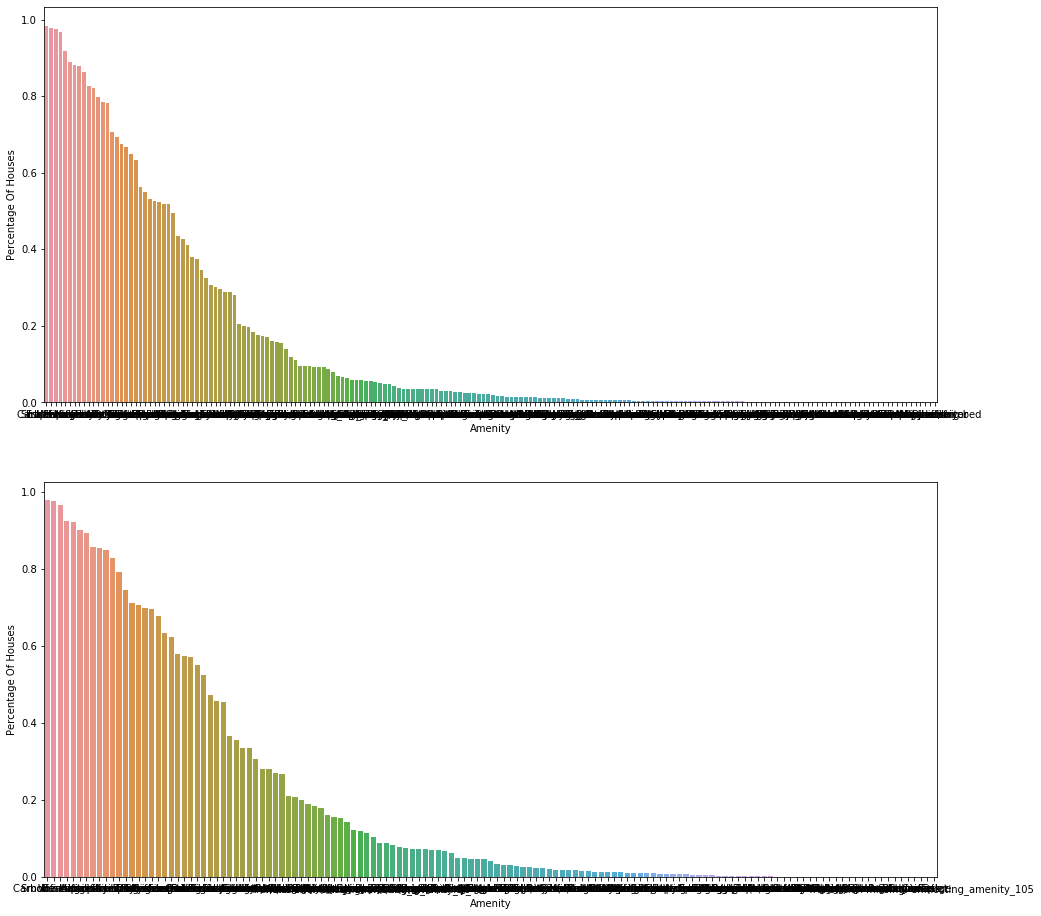

In [38]:
plt.rcParams['figure.figsize'] = [16, 16]
fig, ((ax1, ax2)) = plt.subplots(2, 1)

sns.barplot(x='Amenity', y='Percentage Of Houses', data=seattle_amenity_offers, ax=ax1);
sns.barplot(x='Amenity', y='Percentage Of Houses', data=boston_amenity_offers, ax=ax2);

As you can see data is very noisy, so let's take the most 20 from both datasets

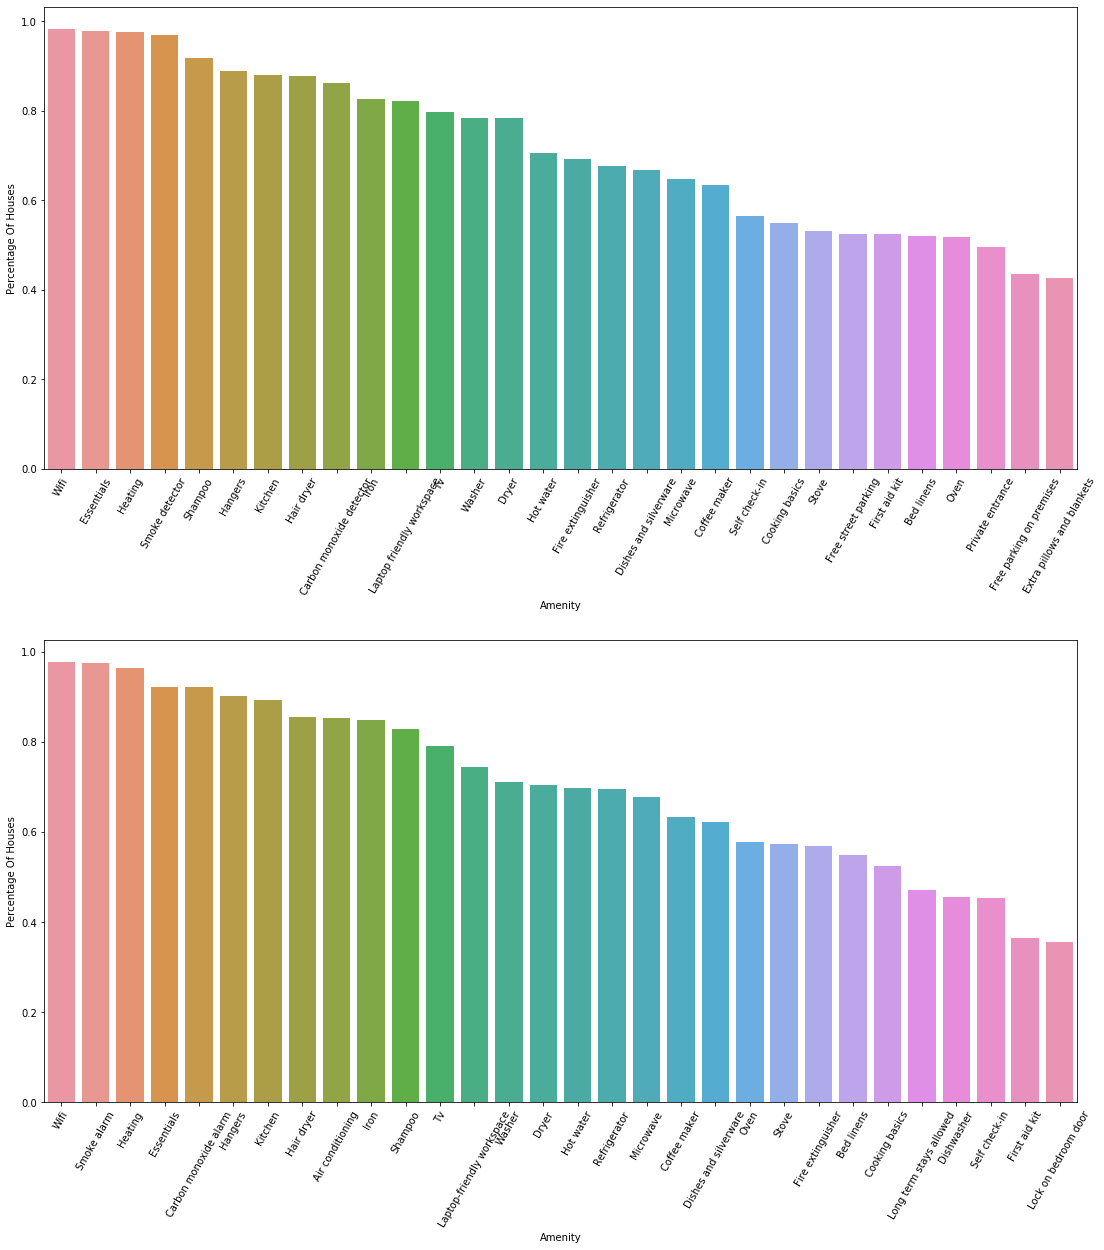

In [39]:
plt.rcParams['figure.figsize'] = [16, 18]
fig, ((ax1, ax2)) = plt.subplots(2, 1)

chart1 = sns.barplot(x='Amenity', y='Percentage Of Houses', data=seattle_amenity_offers.iloc[:30, :], ax=ax1)
chart2 = sns.barplot(x='Amenity', y='Percentage Of Houses', data=boston_amenity_offers.iloc[:30, :], ax=ax2)

chart1.set_xticklabels(chart1.get_xticklabels(), rotation=60);
chart2.set_xticklabels(chart2.get_xticklabels(), rotation=60);

fig.tight_layout(pad=3.0)

plt.savefig('Seattle_Boston_seaborn.png')

As you can see, many of the amenities are same between Boston and Seattle!

Let's which amenity is a must have for our scores!

In [67]:
# Select the best 50 according to our score
top_assets = seattle_amenities.sort_values(by='Score', ascending=False).iloc[:50, 4:].mean().sort_values(ascending=False).reset_index()
top_assets.columns = ['index', 'Percentage of Best 50 Contains']

In [41]:
seattle_amenity_offers = seattle_amenity_offers.merge(top_assets, left_on='Amenity', right_on='index').drop(columns='index')

In [42]:
seattle_amenity_offers.sort_values(by='Percentage of Best 50 Contains', ascending=False).head(20)

,Amenity,# Of Listings That Offer,Percentage Of Houses,Percentage of Best 50 Contains
0,Wifi,6855,0.983360,1.00
2,Heating,6804,0.976044,1.00
1,Essentials,6815,0.977622,0.98
3,Smoke detector,6751,0.968441,0.96
4,Shampoo,6401,0.918233,0.96
5,Hangers,6205,0.890116,0.96
7,Hair dryer,6119,0.877779,0.94
8,Carbon monoxide detector,6018,0.863291,0.92
9,Iron,5763,0.826711,0.92
14,Hot water,4926,0.706642,0.90


In [43]:
# Select the best 50 according to our score
top_assets = boston_amenities.sort_values(by='Score', ascending=False).iloc[:50, 4:].mean().sort_values(ascending=False).reset_index()
top_assets.columns = ['index', 'Percentage of Best 50 Contains']

In [44]:
boston_amenity_offers = boston_amenity_offers.merge(top_assets, left_on='Amenity', right_on='index').drop(columns='index')

In [45]:
boston_amenity_offers.sort_values(by='Percentage of Best 50 Contains', ascending=False).head(20)

,Amenity,# Of Listings That Offer,Percentage Of Houses,Percentage of Best 50 Contains
0,Wifi,3348,0.977233,1.00
2,Heating,3305,0.964682,1.00
8,Air conditioning,2923,0.853182,1.00
1,Smoke alarm,3341,0.975190,1.00
3,Essentials,3163,0.923234,0.98
4,Carbon monoxide alarm,3156,0.921191,0.98
5,Hangers,3088,0.901343,0.96
7,Hair dryer,2929,0.854933,0.96
9,Iron,2908,0.848803,0.96
15,Hot water,2394,0.698774,0.96


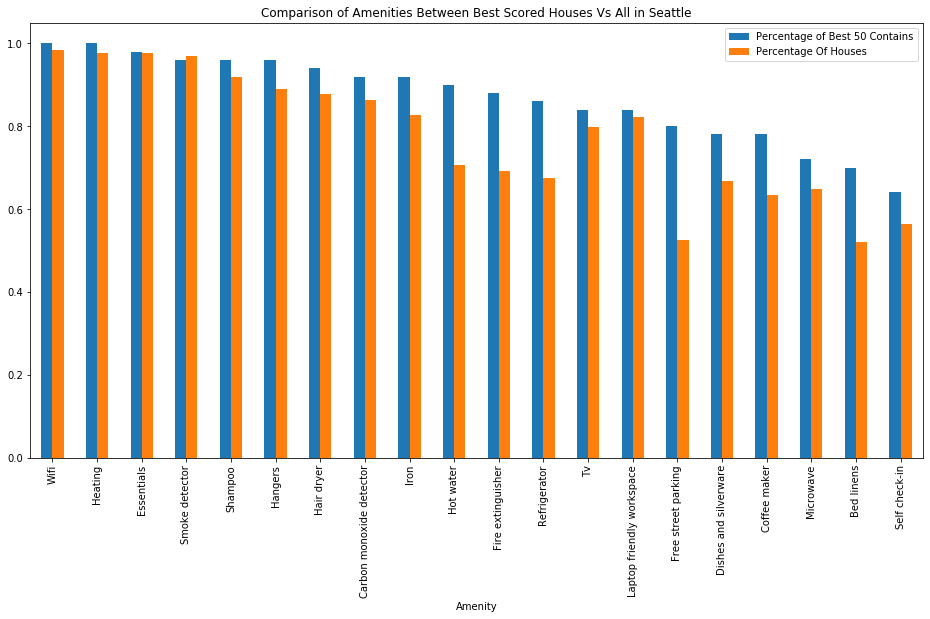

In [46]:
plt.rcParams['figure.figsize'] = [16, 8]

seattle_amenity_offers.sort_values(by='Percentage of Best 50 Contains',
                                   ascending=False).head(20).plot(x="Amenity",
                                                                  y=[ "Percentage of Best 50 Contains", "Percentage Of Houses"],
                                                                  kind="bar");
plt.title("Comparison of Amenities Between Best Scored Houses Vs All in Seattle");

plt.savefig('Comparison of Amenities Between Best Scored Houses Vs All in Seattle.png')

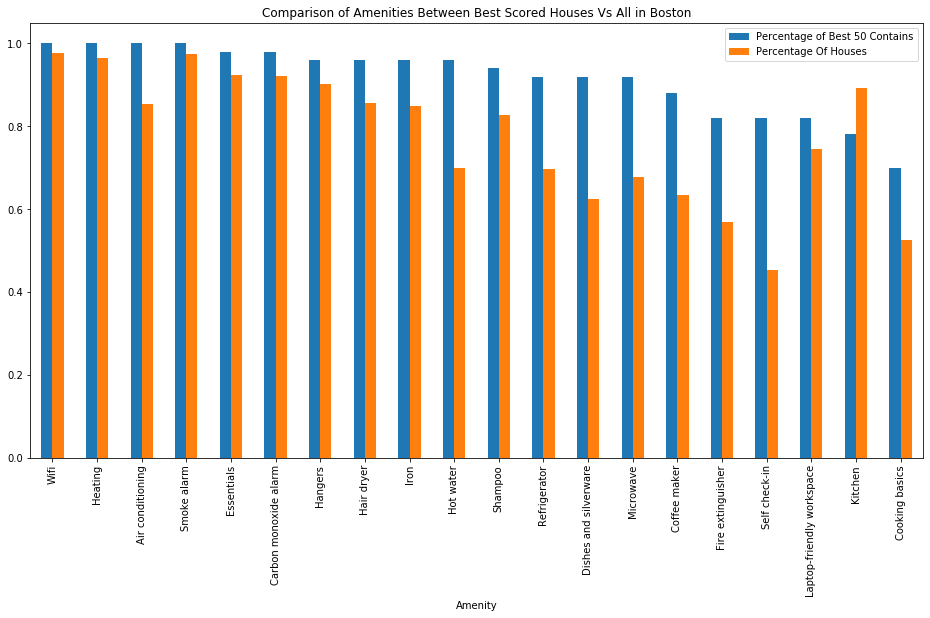

In [47]:
plt.rcParams['figure.figsize'] = [16, 8]

boston_amenity_offers.sort_values(by='Percentage of Best 50 Contains',
                                   ascending=False).head(20).plot(x="Amenity",
                                                                  y=[ "Percentage of Best 50 Contains", "Percentage Of Houses"],
                                                                  kind="bar")
plt.title("Comparison of Amenities Between Best Scored Houses Vs All in Boston");

plt.savefig('Comparison of Amenities Between Best Scored Houses Vs All in Boston.png')

In [48]:
total_amenities = seattle_amenity_offers.merge(boston_amenity_offers, on="Amenity", suffixes=('_Seattle', '_Boston'))

In [49]:
total_amenities.head(2)

,Amenity,# Of Listings That Offer_Seattle,Percentage Of Houses_Seattle,Percentage of Best 50 Contains_Seattle,# Of Listings That Offer_Boston,Percentage Of Houses_Boston,Percentage of Best 50 Contains_Boston
0,Wifi,6855,0.983360,1.00,3348,0.977233,1.00
1,Essentials,6815,0.977622,0.98,3163,0.923234,0.98


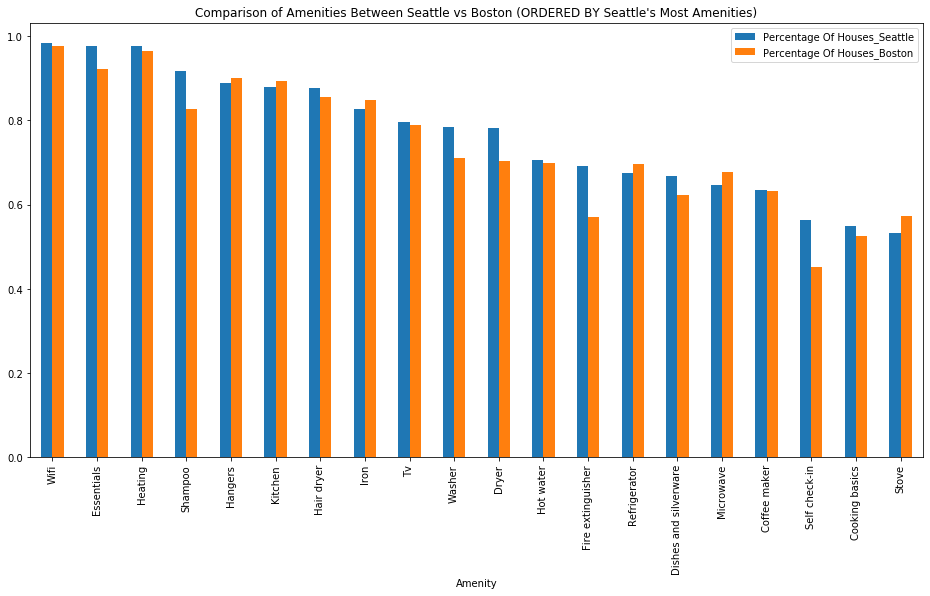

In [50]:
plt.rcParams['figure.figsize'] = [16, 8]

total_amenities.sort_values(by='Percentage Of Houses_Seattle',
                            ascending=False).head(20).plot(x="Amenity",
                                                           y=["Percentage Of Houses_Seattle",
                                                              "Percentage Of Houses_Boston"],
                                                           kind="bar")
plt.title("Comparison of Amenities Between Seattle vs Boston (ORDERED BY Seattle's Most Amenities)");

plt.savefig('Comparison of Amenities Between Seattle vs Boston 1.png')

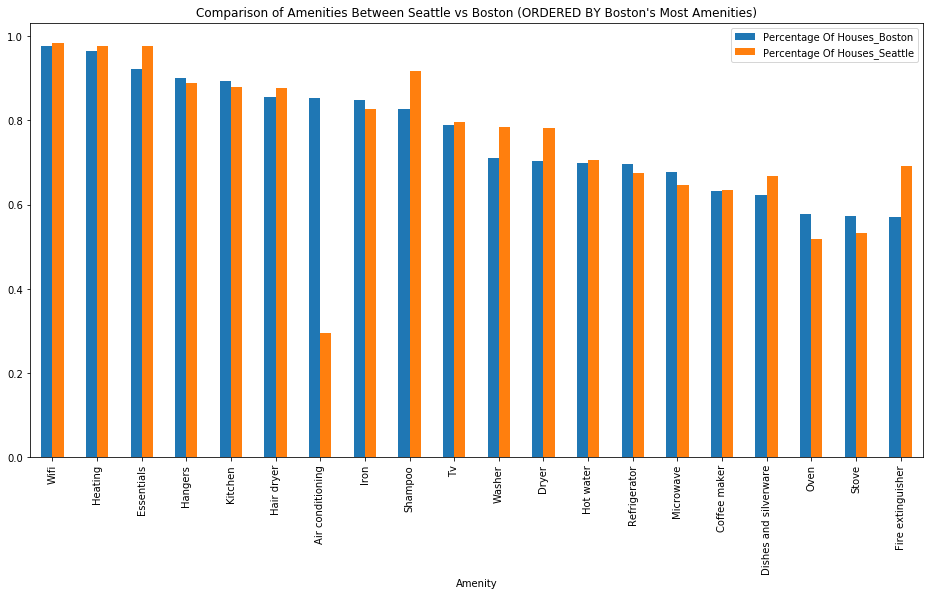

In [51]:
plt.rcParams['figure.figsize'] = [16, 8]

total_amenities.sort_values(by='Percentage Of Houses_Boston',
                            ascending=False).head(20).plot(x="Amenity",
                                                           y=["Percentage Of Houses_Boston",
                                                              "Percentage Of Houses_Seattle"],
                                                           kind="bar")
plt.title("Comparison of Amenities Between Seattle vs Boston (ORDERED BY Boston's Most Amenities)");

plt.savefig('Comparison of Amenities Between Seattle vs Boston 2.png')

**IMPORTANT NOTES TO TAKE:**

**TO-DO**

## 2. Question 2:

**Q2: How does the price change with each month and what is the number of listings for each month?**

In [52]:
seattle_calendar = pd.read_csv('data/seattle/calendar.csv', parse_dates=['date'])

In [53]:
boston_calendar = pd.read_csv('data/boston/calendar.csv', parse_dates=['date'])

In [54]:
seattle_calendar['price_int'] = seattle_calendar['price'].map(lambda x: int(x[1:-3].replace(",", "")))

In [55]:
boston_calendar['price_int'] = boston_calendar['price'].map(lambda x: int(x[1:-3].replace(",", "")))

In [56]:
seattle_calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,price_int
0,2318,2020-05-21,f,$243.00,$243.00,1,1125,243
1,708774,2020-05-21,f,$105.00,$105.00,30,1125,105
2,708774,2020-05-22,f,$120.00,$120.00,30,1125,120
3,708774,2020-05-23,f,$120.00,$120.00,30,1125,120
4,708774,2020-05-24,f,$105.00,$105.00,30,1125,105


In [57]:
boston_calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,price_int
0,3781,2020-06-10,f,$125.00,$125.00,28,1125,125
1,3781,2020-06-11,f,$125.00,$125.00,28,1125,125
2,3781,2020-06-12,f,$125.00,$125.00,28,1125,125
3,3781,2020-06-13,f,$125.00,$125.00,28,1125,125
4,3781,2020-06-14,f,$125.00,$125.00,28,1125,125


In [58]:
# To analyze for each month, let's extract the month for each date

seattle_calendar['month'] = pd.DatetimeIndex(seattle_calendar['date']).month
boston_calendar['month'] = pd.DatetimeIndex(boston_calendar['date']).month

In [59]:
seattle_each_month = seattle_calendar[seattle_calendar.available == 't'].groupby(['month']).agg({'price_int': np.mean, 'date': 'count'}).reset_index()

In [60]:
boston_each_month = boston_calendar[boston_calendar.available == 't'].groupby(['month']).agg({'price_int': np.mean, 'date': 'count'}).reset_index()

In [61]:
seattle_each_month.head()

,month,price_int,date
0,1,170.314935,72434
1,2,173.479970,61881
2,3,184.409178,64742
3,4,193.834090,63649
4,5,179.347280,69503


In [62]:
import plotly.offline as pyo
from plotly.graph_objs import *

In [68]:
traces = []
traces.append(Scatter({
         'x' : seattle_each_month['month'],
         'y' : seattle_each_month['price_int'],
         'name' : 'Average Price For That Month',
         'mode' : 'lines'}))
layout = {'title' : 'Mean Price of Seattle Aggregate Listings For 2020-2021',
         'xaxis' : {'title' : 'Month'},
         'yaxis' : {'title' : 'Price'}}
fig = Figure(data = traces, layout = layout)
pyo.iplot(fig)

In [64]:
traces = []
traces.append(Scatter({
         'x' : seattle_each_month['month'],
         'y' : seattle_each_month['date'],
         'name' : 'Count of Listings',
         'mode' : 'lines'}))
layout = {'title' : 'Seattle Aggregate Listings For 2020-2021',
         'xaxis' : {'title' : 'Month'},
         'yaxis' : {'title' : 'Number Of Listings'}}
fig = Figure(data = traces, layout = layout)
pyo.iplot(fig)

In [69]:
traces = []
traces.append(Scatter({
         'x' : boston_each_month['month'],
         'y' : boston_each_month['price_int'],
         'name' : 'Average Price For That Month',
         'mode' : 'lines'}))
layout = {'title' : 'Mean Price of Boston Aggregate Listings For 2020-2021',
         'xaxis' : {'title' : 'Month'},
         'yaxis' : {'title' : 'Price'}}
fig = Figure(data = traces, layout = layout)
pyo.iplot(fig)

In [70]:
traces = []
traces.append(Scatter({
         'x' : boston_each_month['month'],
         'y' : boston_each_month['date'],
         'name' : 'Count of Listings',
         'mode' : 'lines'}))
layout = {'title' : 'Boston Aggregate Listings For 2020-2021',
         'xaxis' : {'title' : 'Month'},
         'yaxis' : {'title' : 'Number Of Listings'}}
fig = Figure(data = traces, layout = layout)
pyo.iplot(fig)